In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('database_IND.csv')
data.head(20)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.50,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.00,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.20,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.00,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.00,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.00,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.00,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.195200,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.00,32.2258,77.2070,Hydro,NaN,NaN,...,2019.0,NaN,674.391100,721.335200,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.00,16.3300,75.8863,Hydro,NaN,NaN,...,2019.0,NaN,480.594950,144.434200,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.00,23.1642,81.6373,Coal,Oil,NaN,...,2019.0,NaN,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


In [3]:
data.shape

(907, 27)

In [4]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


#### Checking for Null values

In [5]:
data.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

#### Checking datatypes of columns

In [6]:
data.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

#### Dropping columns in which almost no data available

In [7]:
data=data.drop(columns=['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','owner'])

In [8]:
data.shape

(907, 19)

#### let's deal with null values

In [9]:
data['latitude']=data['latitude'].fillna(data['latitude'].mean())

In [10]:
data['longitude']=data['longitude'].fillna(data['longitude'].mean())

In [11]:
data['geolocation_source']=data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

In [12]:
data['commissioning_year']=data['commissioning_year'].fillna(data['commissioning_year'].mode()[0])

In [13]:
data['year_of_capacity_data']=data['year_of_capacity_data'].fillna(data['year_of_capacity_data'].mode()[0])

In [14]:
data['generation_gwh_2014']=data['generation_gwh_2014'].fillna(data['generation_gwh_2014'].mean())

In [15]:
data['generation_gwh_2015']=data['generation_gwh_2015'].fillna(data['generation_gwh_2015'].mean())

In [16]:
data['generation_gwh_2016']=data['generation_gwh_2016'].fillna(data['generation_gwh_2016'].mean())

In [17]:
data['generation_gwh_2017']=data['generation_gwh_2017'].fillna(data['generation_gwh_2017'].mean())

In [18]:
data['generation_gwh_2018']=data['generation_gwh_2018'].fillna(data['generation_gwh_2018'].mean())

In [19]:
data['generation_data_source']=data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])

#### Checking for values which has 0 values

In [20]:
for column_name in data.columns:
    column = data[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  country  is :  0
Count of zeros in column  country_long  is :  0
Count of zeros in column  name  is :  0
Count of zeros in column  gppd_idnr  is :  0
Count of zeros in column  capacity_mw  is :  1
Count of zeros in column  latitude  is :  0
Count of zeros in column  longitude  is :  0
Count of zeros in column  primary_fuel  is :  0
Count of zeros in column  commissioning_year  is :  0
Count of zeros in column  source  is :  0
Count of zeros in column  url  is :  0
Count of zeros in column  geolocation_source  is :  0
Count of zeros in column  year_of_capacity_data  is :  0
Count of zeros in column  generation_gwh_2014  is :  28
Count of zeros in column  generation_gwh_2015  is :  27
Count of zeros in column  generation_gwh_2016  is :  30
Count of zeros in column  generation_gwh_2017  is :  32
Count of zeros in column  generation_gwh_2018  is :  39
Count of zeros in column  generation_data_source  is :  0


#### let's deal with 0 values

In [21]:
data['capacity_mw']=data['capacity_mw'].replace(0.0,data['capacity_mw'].mean())

In [22]:
data['generation_gwh_2014']=data['generation_gwh_2014'].replace(0.0,data['generation_gwh_2014'].mean())

In [23]:
data['generation_gwh_2015']=data['generation_gwh_2015'].replace(0.0,data['generation_gwh_2015'].mean())

In [24]:
data['generation_gwh_2016']=data['generation_gwh_2016'].replace(0.0,data['generation_gwh_2016'].mean())

In [25]:
data['generation_gwh_2017']=data['generation_gwh_2017'].replace(0.0,data['generation_gwh_2017'].mean())

In [26]:
data['generation_gwh_2018']=data['generation_gwh_2018'].replace(0.0,data['generation_gwh_2018'].mean())

In [27]:
data.dtypes

country                    object
country_long               object
name                       object
gppd_idnr                  object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
source                     object
url                        object
geolocation_source         object
year_of_capacity_data     float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

### Visualization of the Categorical columns

IND    907
Name: country, dtype: int64


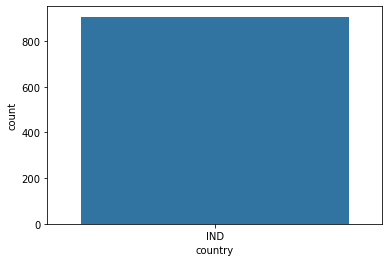

In [28]:
ax=sns.countplot(x='country',data=data)
print(data['country'].value_counts())

India    907
Name: country_long, dtype: int64


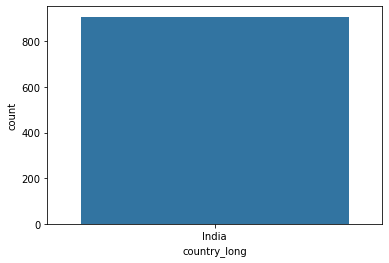

In [29]:
ax=sns.countplot(x='country_long',data=data)
print(data['country_long'].value_counts())

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


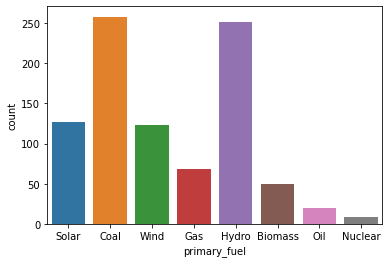

In [30]:
ax=sns.countplot(x='primary_fuel',data=data)
print(data['primary_fuel'].value_counts())

#### Checking the Distribution of the Continuous data

In [31]:
df_continuous=data.drop(columns=['country','country_long','name','gppd_idnr','primary_fuel','commissioning_year','source','url','geolocation_source','generation_data_source'])

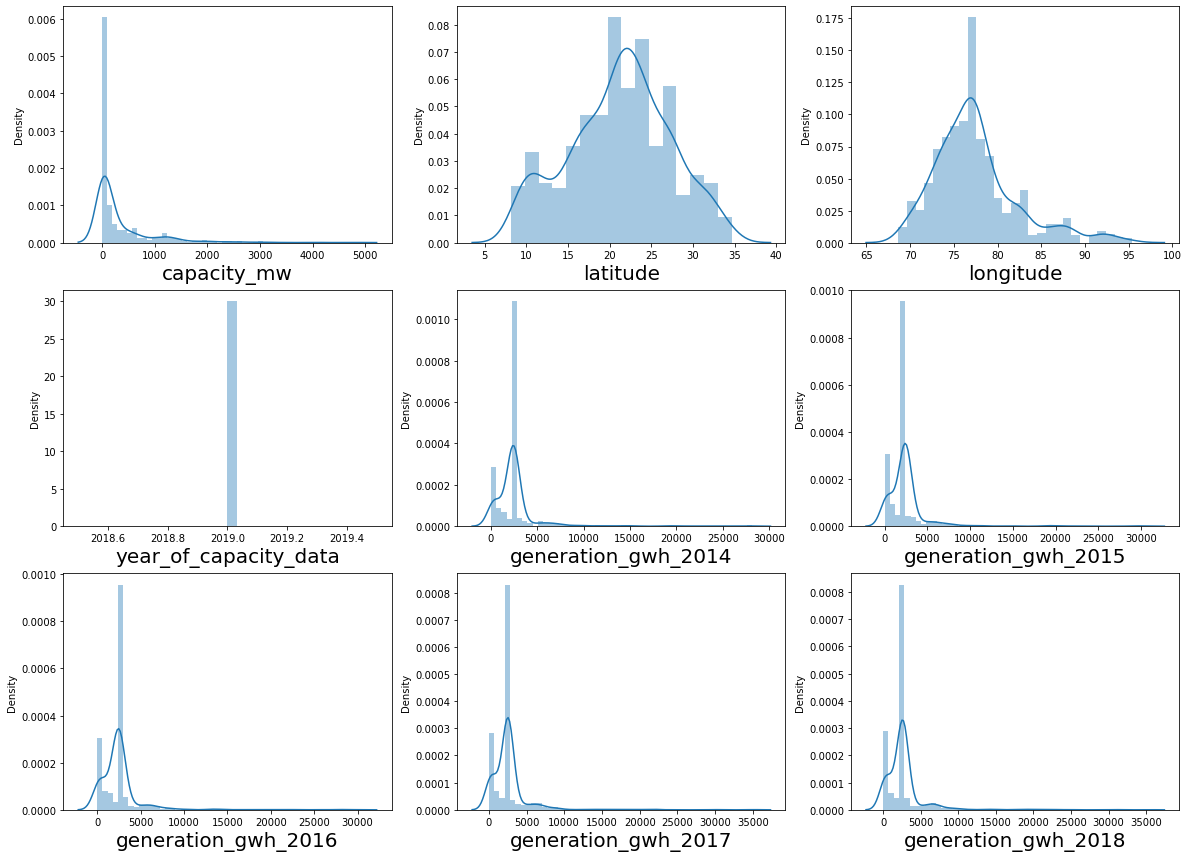

In [32]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in df_continuous:
    if plotnumber<=25:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df_continuous[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Encoding of the Dataset

In [33]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

#### Checking Correlation

In [34]:
data.corr()['primary_fuel']

country                        NaN
country_long                   NaN
name                      0.040753
gppd_idnr                 0.609180
capacity_mw              -0.379712
latitude                 -0.010204
longitude                -0.347948
primary_fuel              1.000000
commissioning_year        0.164947
source                    0.053613
url                       0.589886
geolocation_source       -0.483217
year_of_capacity_data          NaN
generation_gwh_2014      -0.137544
generation_gwh_2015      -0.133534
generation_gwh_2016      -0.139115
generation_gwh_2017      -0.146975
generation_gwh_2018      -0.151993
generation_data_source         NaN
Name: primary_fuel, dtype: float64

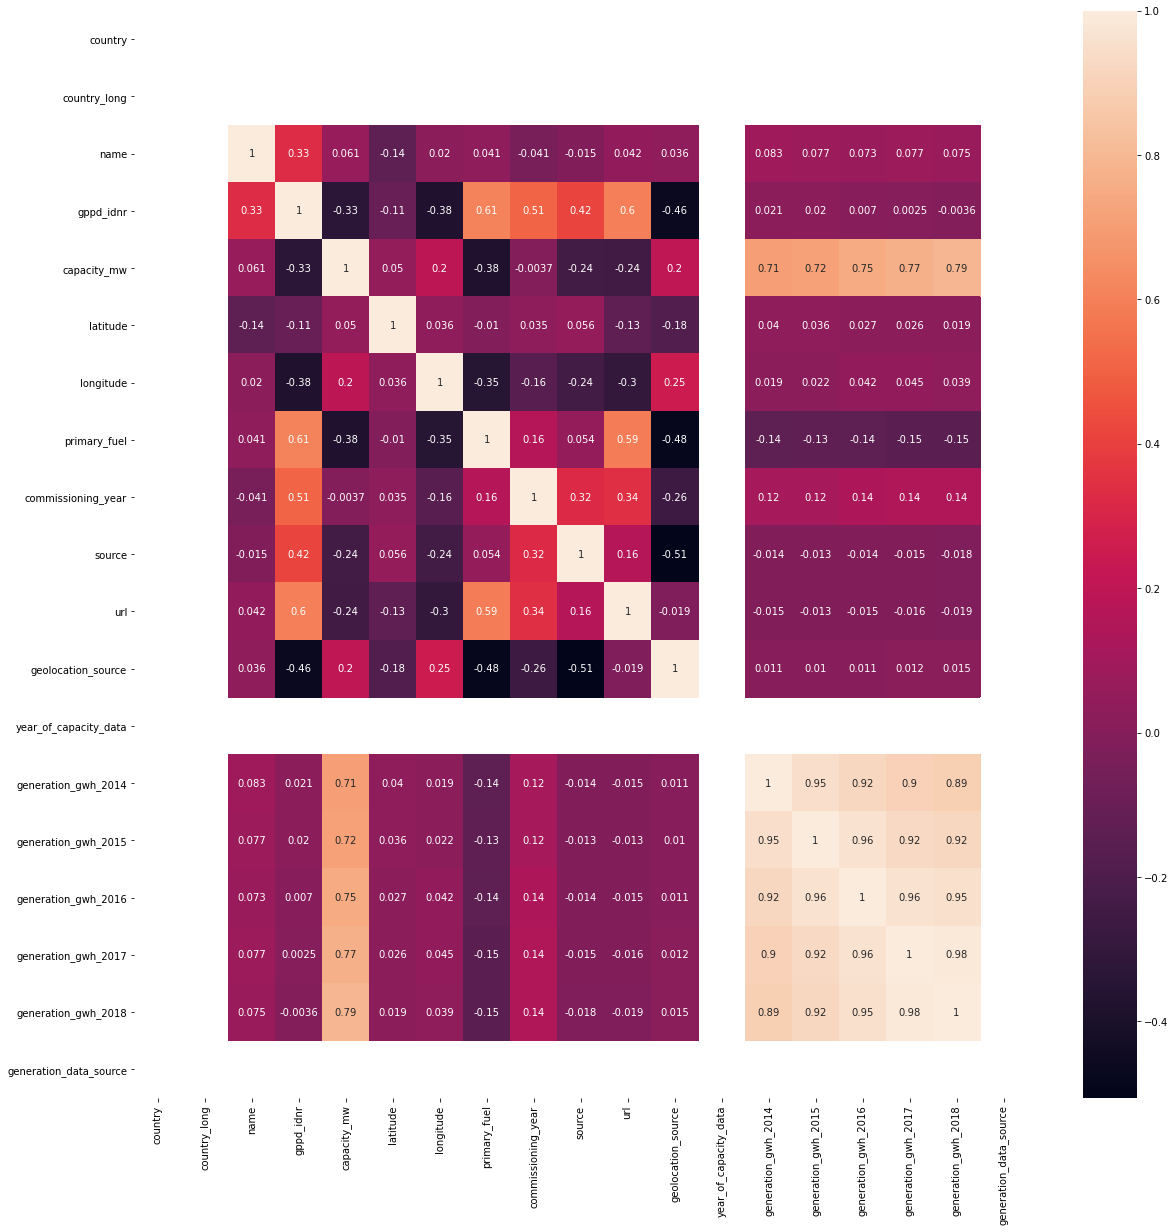

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### Dropping columns which has no relation with the target variable

In [36]:
data_new=data.drop(columns=['country','country_long','year_of_capacity_data','generation_data_source','latitude'])

In [37]:
data_new.shape

(907, 14)

### Checking for outliers using boxplot

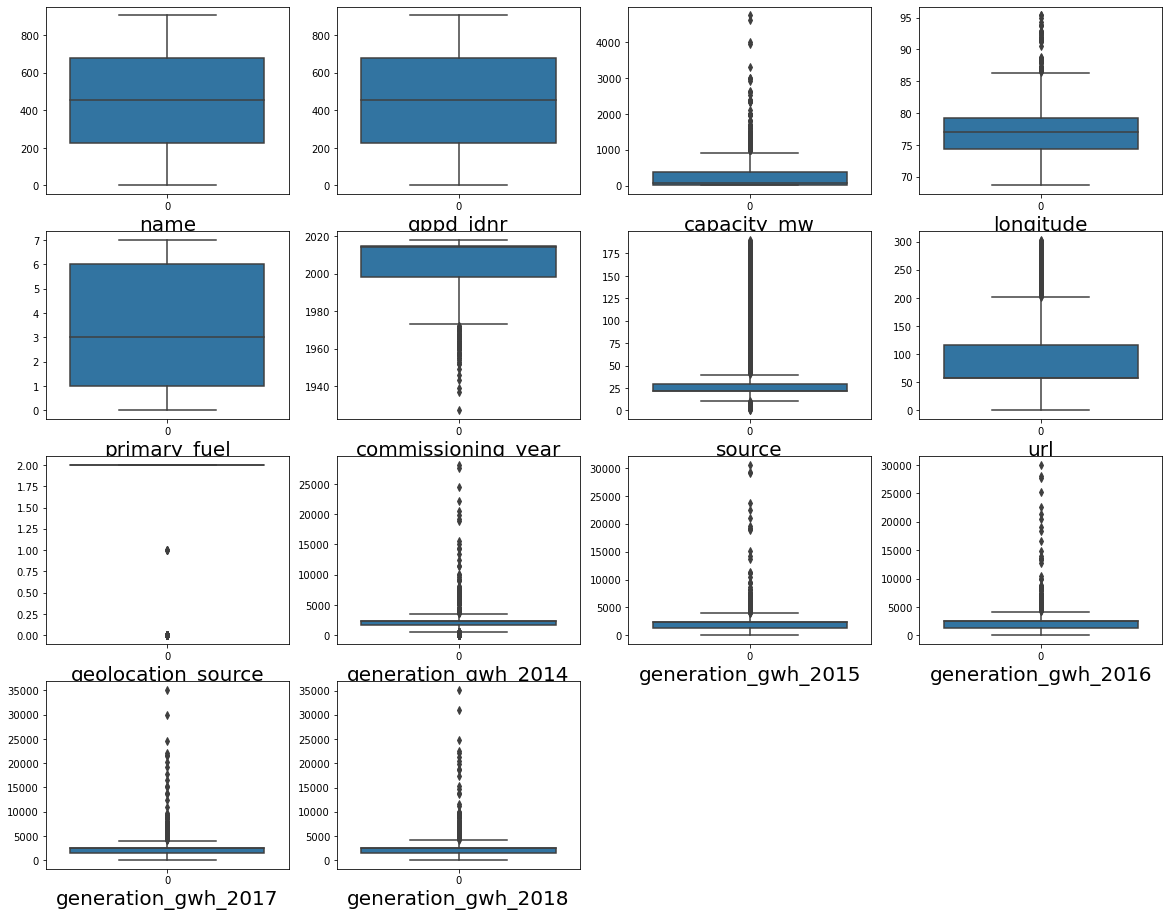

In [38]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data_new:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data=data_new[column],orient='v')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

we are not removing the outliers since these are the possible outcomes

# Taking 'primary_fuel' as Target variable

In [39]:
x=data_new.drop(columns='primary_fuel')
y=data_new['primary_fuel']

In [40]:
x

,name,gppd_idnr,capacity_mw,longitude,commissioning_year,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,657,2.5,73.2407,2011.0,109,128,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,1,519,98.0,74.6090,2015.0,174,173,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2,853,39.2,69.3732,2015.0,21,205,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,3,0,135.0,91.3602,2004.0,22,58,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1,1800.0,82.4091,2015.0,22,58,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,902,491,1600.0,77.3568,2016.0,22,58,2,2431.823590,0.994875,233.596650,865.400000,686.500000
903,903,822,3.0,78.1654,2015.0,77,22,0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
904,904,891,25.5,75.5811,2015.0,21,260,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
905,905,539,80.0,73.7477,2015.0,59,82,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099


In [41]:
y

0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Name: primary_fuel, Length: 907, dtype: int32

### Checking Skewness

In [42]:
x.skew().sort_values()

geolocation_source    -2.159841
commissioning_year    -1.714873
name                   0.000000
gppd_idnr              0.000000
longitude              1.141881
url                    1.510537
source                 1.827373
capacity_mw            3.123513
generation_gwh_2018    5.109110
generation_gwh_2014    5.181256
generation_gwh_2016    5.201221
generation_gwh_2017    5.262447
generation_gwh_2015    5.489306
dtype: float64

### Transform data to remove skewness

In [43]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

### Scaling the data

In [44]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[-2.16561515,  0.79063305, -1.7077094 , ...,  0.26314496,
         0.25464079,  0.25368357],
       [-2.14663031,  0.33133539,  0.19227902, ...,  0.26314496,
         0.25464079,  0.25368357],
       [-2.13033981,  1.39746613, -0.29536195, ...,  0.26314496,
         0.25464079,  0.25368357],
       ...,
       [ 1.54842588,  1.51018594, -0.5268342 , ...,  0.26314496,
         0.25464079,  0.25368357],
       [ 1.55136078,  0.39991495,  0.0852143 , ...,  0.26314496,
         0.25464079,  0.25368357],
       [ 1.55429474,  1.4658612 , -0.76117393, ...,  0.26314496,
         0.25464079,  0.25368357]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [45]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.669191,name
1,4.161496,gppd_idnr
2,2.016909,capacity_mw
3,1.290838,longitude
4,1.898388,commissioning_year
5,1.285604,source
6,1.481452,url
7,1.705350,geolocation_source
8,4.285494,generation_gwh_2014
9,5.703571,generation_gwh_2015


In [46]:
x=data_new.drop(columns=['generation_gwh_2016','generation_gwh_2018'])  # due to multicolinearity exist

In [47]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [48]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[-2.16561515,  0.79063305, -1.7077094 , ...,  0.2402156 ,
         0.26404342,  0.25464079],
       [-2.14663031,  0.33133539,  0.19227902, ...,  0.2402156 ,
         0.26404342,  0.25464079],
       [-2.13033981,  1.39746613, -0.29536195, ...,  0.2402156 ,
         0.26404342,  0.25464079],
       ...,
       [ 1.54842588,  1.51018594, -0.5268342 , ...,  0.2402156 ,
         0.26404342,  0.25464079],
       [ 1.55136078,  0.39991495,  0.0852143 , ...,  0.2402156 ,
         0.26404342,  0.25464079],
       [ 1.55429474,  1.4658612 , -0.76117393, ...,  0.2402156 ,
         0.26404342,  0.25464079]])

In [49]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.672598,name
1,4.291057,gppd_idnr
2,2.046977,capacity_mw
3,1.295275,longitude
4,2.637368,primary_fuel
5,1.999369,commissioning_year
6,1.634752,source
7,1.949662,url
8,2.366811,geolocation_source
9,4.282639,generation_gwh_2014


### Finding the best random state

In [50]:
maxAccu=0 #maximum accuracy
maxRS=0  # best random state value for which max accuracy is achieved
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Max Accuracy is',maxAccu,'on Random State ',maxRS)

Max Accuracy is 0.960352422907489 on Random State  554


### Splitting data Into Training and test data

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=554)

### Logistic Regression

In [52]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

96.0352422907489
[[ 1  2  0  1  0  1  3  1]
 [ 3 20  4 19  0  3 11  9]
 [ 1  5  0  4  0  0  1  2]
 [ 5 15  1 23  0  1  8  7]
 [ 0  1  0  1  0  0  1  0]
 [ 0  1  0  0  0  0  0  0]
 [ 3  7  2  9  0  1  3  6]
 [ 2 11  2 16  0  0  8  2]]
              precision    recall  f1-score   support

           0       0.07      0.11      0.08         9
           1       0.32      0.29      0.31        69
           2       0.00      0.00      0.00        13
           3       0.32      0.38      0.35        60
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.09      0.10      0.09        31
           7       0.07      0.05      0.06        41

    accuracy                           0.22       227
   macro avg       0.11      0.12      0.11       227
weighted avg       0.21      0.22      0.21       227



### Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
pred=DT.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  100.0
[[ 9  0  0  0  0  0  0  0]
 [ 0 69  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0]
 [ 0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        41

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  99.11894273127754
[[ 9  0  0  0  0  0  0  0]
 [ 0 69  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        69
           2       1.00      1.00      1.00        13
           3       0.98      1.00      0.99        60
           4       1.00      0.33      0.50         3
           5       0.50      1.00      0.67         1
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        41

    accuracy                           0.99       227
   macro avg       0.94      0.92      0.89       227
weighted avg       0.99      0.99      0.99       227



### SVC

In [55]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Accuracy ',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy  96.47577092511013
[[ 9  0  0  0  0  0  0  0]
 [ 0 69  0  0  0  0  0  0]
 [ 0  2  9  2  0  0  0  0]
 [ 0  0  0 60  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  1 30  0]
 [ 0  0  0  0  0  0  0 41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.97      1.00      0.99        69
           2       1.00      0.69      0.82        13
           3       0.92      1.00      0.96        60
           4       0.00      0.00      0.00         3
           5       0.50      1.00      0.67         1
           6       1.00      0.97      0.98        31
           7       1.00      1.00      1.00        41

    accuracy                           0.96       227
   macro avg       0.80      0.83      0.80       227
weighted avg       0.96      0.96      0.96       227



Logistic Regression ,Decision Tree ,Random Forest and SVC are producing good accuracy. Now we will check for cross validation score as well for overfitting

### Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
cvs_LR=cross_val_score(LR,x_new,y,cv=5)
print("Cross Validation score for Logistic Regresiion is ",cvs_LR.mean())

Cross Validation score for Logistic Regresiion is  0.9151235504826666


In [58]:
cvs_DT=cross_val_score(DT,x_new,y,cv=5)
print("Cross validation score for Decision tree is ",cvs_DT.mean())

Cross validation score for Decision tree is  0.9977900552486189


In [59]:
cvs_RF=cross_val_score(RF,x_new,y,cv=5)
print("Cross validation score for Random Forest is ",cvs_RF.mean())

Cross validation score for Random Forest is  0.9922712646469554


In [60]:
cvs_SVC=cross_val_score(svc,x_new,y,cv=5)
print("Cross validation score for SVC is ",cvs_SVC.mean())

Cross validation score for SVC is  0.9261429178556251


we are not selecting decision tree because it is producing 100% accuracy ,so we choose Random Forest Classifier as our final model and Hyper parameter tuning is not required since it is producing best accuracy

#### Saving the model

In [270]:
import pickle
filename='Globalpowerplant_classi.pickle'
pickle.dump(RF,open(filename,'wb'))

# Taking 'capacity_mw' as Target variable

In [356]:
data.corr()['capacity_mw']

country                        NaN
country_long                   NaN
name                      0.061126
gppd_idnr                -0.334953
capacity_mw               1.000000
latitude                  0.050155
longitude                 0.195942
primary_fuel             -0.379712
commissioning_year       -0.003669
source                   -0.240493
url                      -0.243277
geolocation_source        0.203338
year_of_capacity_data          NaN
generation_gwh_2014       0.705678
generation_gwh_2015       0.716283
generation_gwh_2016       0.747363
generation_gwh_2017       0.769553
generation_gwh_2018       0.789066
generation_data_source         NaN
Name: capacity_mw, dtype: float64

#### Dropping columns which have less relation with target variable

In [357]:
data_new=data.drop(columns=['country','country_long','name','latitude','commissioning_year','year_of_capacity_data','generation_data_source'])

### Dividing the Dataset into dependent and independent variable

In [358]:
x=data_new.drop(columns='capacity_mw')
y=data_new['capacity_mw']

### Checking Skewness

In [359]:
x.skew().sort_values()

geolocation_source    -2.159841
gppd_idnr              0.000000
primary_fuel           0.472251
longitude              1.141881
url                    1.510537
source                 1.827373
generation_gwh_2018    5.109110
generation_gwh_2014    5.181256
generation_gwh_2016    5.201221
generation_gwh_2017    5.262447
generation_gwh_2015    5.489306
dtype: float64

### Transform data to remove skewness

In [360]:
x_new=power_transform(x)

### Scaling the data

In [361]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[ 0.79063305, -0.95254455,  1.1713128 , ...,  0.26314496,
         0.25464079,  0.25368357],
       [ 0.33133539, -0.54497607, -0.99629108, ...,  0.26314496,
         0.25464079,  0.25368357],
       [ 1.39746613, -2.37986379,  1.4415761 , ...,  0.26314496,
         0.25464079,  0.25368357],
       ...,
       [ 1.51018594, -0.28081923,  1.4415761 , ...,  0.26314496,
         0.25464079,  0.25368357],
       [ 0.39991495, -0.7963743 , -0.99629108, ...,  0.26314496,
         0.25464079,  0.25368357],
       [ 1.4658612 ,  0.18088946,  1.4415761 , ...,  0.26314496,
         0.25464079,  0.25368357]])

### Checking Multicolinearity using VIF(variance inflation factor)

In [362]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.886825,gppd_idnr
1,1.279005,longitude
2,2.389897,primary_fuel
3,1.577102,source
4,1.840502,url
5,2.211370,geolocation_source
6,4.258028,generation_gwh_2014
7,5.636425,generation_gwh_2015
8,8.057540,generation_gwh_2016
9,14.373788,generation_gwh_2017


In [363]:
x=data_new.drop(columns=['generation_gwh_2016','generation_gwh_2018'])  # due to multicolinearity exist

In [364]:
x_new=power_transform(x)

In [365]:
sc=StandardScaler()
x_new=sc.fit_transform(x_new)
x_new

array([[ 0.79063305, -1.7077094 , -0.95254455, ...,  0.2402156 ,
         0.26404342,  0.25464079],
       [ 0.33133539,  0.19227902, -0.54497607, ...,  0.2402156 ,
         0.26404342,  0.25464079],
       [ 1.39746613, -0.29536195, -2.37986379, ...,  0.2402156 ,
         0.26404342,  0.25464079],
       ...,
       [ 1.51018594, -0.5268342 , -0.28081923, ...,  0.2402156 ,
         0.26404342,  0.25464079],
       [ 0.39991495,  0.0852143 , -0.7963743 , ...,  0.2402156 ,
         0.26404342,  0.25464079],
       [ 1.4658612 , -0.76117393,  0.18088946, ...,  0.2402156 ,
         0.26404342,  0.25464079]])

In [366]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_new,i)for i in range(x_new.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,2.133193,gppd_idnr
1,1.884516,capacity_mw
2,1.272356,longitude
3,2.481622,primary_fuel
4,1.631796,source
5,1.840207,url
6,2.245623,geolocation_source
7,4.268856,generation_gwh_2014
8,4.140672,generation_gwh_2015
9,3.638151,generation_gwh_2017


### Finding the best random state

In [367]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
Lr=LinearRegression()

In [368]:
maxAccu=0
maxRS=0
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=i)
    Lr.fit(x_train,y_train)
    y_pred=Lr.predict(x_test)
    accu=r2_score(y_test,y_pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRs=i
print('Max accuracy is ',maxAccu,'on random state',maxRs)
    

Max accuracy is  0.8267639598393989 on random state 273


### Splitting data Into Training and test data

In [369]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.25,random_state=273)

In [370]:
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.8267639598393989


In [371]:
cv_score=cross_val_score(Lr,x_new,y,cv=4)
print(cv_score.mean())

0.7316941574874497


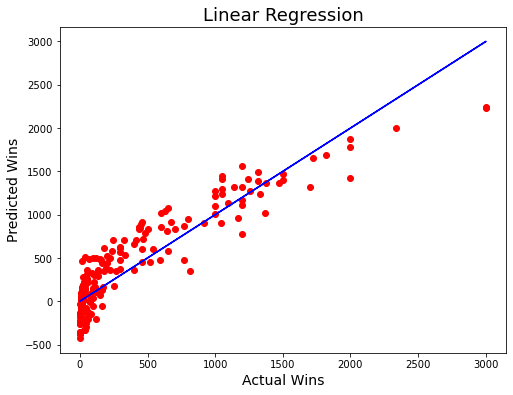

In [372]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization

### Lasso Regression

In [373]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.1, 'max_iter': 100, 'normalize': True, 'random_state': 0}


In [374]:
ls=Lasso(alpha=0.1,random_state=0,max_iter=100,normalize=True)
ls.fit(x_train,y_train)

Lasso(alpha=0.1, max_iter=100, normalize=True, random_state=0)

In [375]:
ls_pred=ls.predict(x_test)
lss=r2_score(y_test,ls_pred)
lss

0.8277549162749536

In [376]:
cv_score_Lasso=cross_val_score(ls,x_new,y,cv=4)
print(cv_score_Lasso.mean())

0.7335445245046776


### Ridge Regression

In [377]:
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'max_iter':[100,200,500,1000],'normalize':[True,False]}
Rg=Ridge()
clf=GridSearchCV(Rg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'max_iter': 100, 'normalize': False, 'random_state': 0}


In [378]:
Rgg=Ridge(alpha=10,random_state=0,max_iter=100,normalize=False)
Rgg.fit(x_train,y_train)

Ridge(alpha=10, max_iter=100, random_state=0)

In [379]:
Rg_pred=Rgg.predict(x_test)
Rgs=r2_score(y_test,Rg_pred)
Rgs

0.8286555917193408

In [380]:
cv_score_ridge=cross_val_score(Rgg,x_new,y,cv=4)
print(cv_score_ridge.mean())

0.7321274913321962


### Ensemble Technique

In [383]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [384]:
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [385]:
rf=RandomForestRegressor(criterion='mae',max_features='auto')
rf.fit(x_train,y_train)


RandomForestRegressor(criterion='mae')

In [386]:
rf_pred=rf.predict(x_test)
rfs=r2_score(y_test,rf_pred)
rfs

0.9975471139245566

So the best accuracy is given by Random forest regressor so we choose it our final model

### Saving the model in pickel

In [387]:
import pickle
filename='Globalpowerplant_regress.pickle'
pickle.dump(rf,open(filename,'wb'))

# Documentation

In [ ]:
Import the csv file then seen the data we found lost's of nulland 0 values in the columns so we delt with that.
We have removed columns which have almost no data available ['other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','owner']
After that we delt with 0 values and null values in the dataset.
Then the vizualization of the categorical and continuous data is done and seen lots of skewness in the continuous data that was removed with the power transform function.
Then encoding is done with the help of label encoder.
Then correlation is checked with the target variable and the columns ['country','country_long','year_of_capacity_data','generation_data_source','latitude'] has been removed since they have very less relationship with the target variable.
Then we checked for outliers and we did not remove them as they are the possible outcomes.
After scaling the data we checked for multicollinearity and it is found so we removed ['generation_gwh_2016','generation_gwh_2018'] columns.
After that we trained the model with several algorithms and found Random forest classifier as the best algo for classification problem.
All the same above steps are done for regression problem and found Random forest regressor as the best algo for the regression problem.
The ROC AUC curve is not made since the classification is not binary, there were several classes.
In the last we saved the model.